In [1]:
import requests
import matplotlib.pyplot as plt
import datetime
import pytz

In [2]:
json_data = requests.get("https://aquametric.menon.pro/data/002/log.json").json()

In [3]:
date_format = '%Y-%m-%dT%H:%M:%S.%f%z'
my_timezone = 'US/Eastern'

def convert_date(date_str):
    return datetime.datetime.strptime(date_str, date_format).astimezone(pytz.timezone(my_timezone))

json_data = {convert_date(date): data for date, data in json_data.items()}

In [4]:
thresh_datetime = datetime.datetime(2020, 4, 7, 15, 0, 0).replace(tzinfo=pytz.timezone('US/Eastern'))
json_data = {date: data for date, data in json_data.items() if date > thresh_datetime}

In [5]:
dates = sorted(list(json_data.keys()))
stages = [json_data[date]["data"]["stage"] for date in dates]
stages = [810 - stage for stage in stages]

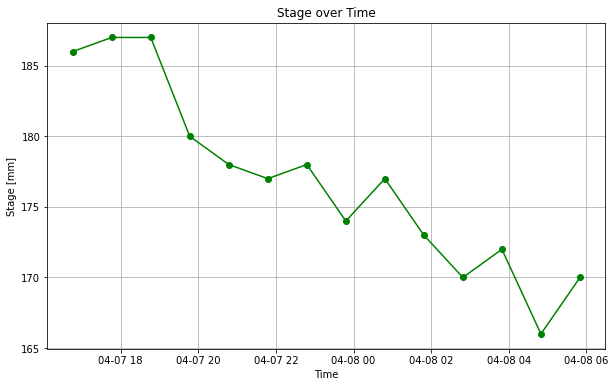

In [6]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(dates, stages, 'go-')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Stage [mm]")
plt.title("Stage over Time")
plt.show()